
- https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-api-documentation

## Collect data from API

In [1]:
import json
import pandas as pd
import urllib.request

country_codes=['IN','US','CN','IE','CA','JP','KE'] # India, USA, China, Ireland, Canada, Japan, Kenya
wdUrl='http://api.worldbank.org/'  # url to select the 
period = '1960:2013' # selected years are from 1960 to 2013. For recent years like 2016 data is not present
# the world bank contains data for various countries like GDP, Population and other key features for different countries
feature_codes=['AG.LND.ARBL.ZS','AG.LND.FRST.ZS','EG.USE.ELEC.KH.PC','NY.GDP.MKTP.CD',
            'SL.UEM.TOTL.ZS', 'AG.PRD.CREL.MT','SP.DYN.TFRT.IN',
            'SP.POP.TOTL','MS.MIL.XPND.GD.ZS']  # these are indicaters used to form query


def loadData(cCode):   #function used to load data for a given country in 
    dataList=[]
    for fcode in feature_codes:    # do this for all the indicaters or features
        url=wdUrl+'countries/'+cCode+'/indicators/'+fcode+'?per_page=100&date='+period+'&format=json' # form the url for a feature
        wbData=urllib.request.urlopen(url)  #request the data through url
        jsonData = wbData.read().decode('utf-8')  # read the data in the utf-8 format
        data=json.loads(jsonData)   # load json object and form a python data structure
        dataList.append(data)       # collect data for all the features
        wbData.close()
    return dataList

##  Parse the collected data, and store it in an csv file format

In [4]:
header=""
def writeData(cCode):    #method to write data for a country with features
    toWritecsv= open(cCode+".csv",'w')  #open file in write mode
    headers=[]   # create header for columns
    headers.append('Year,')
    headers.append('Arable Land(hect),') #Arable land (in hectares) includes land defined by the FAO as land under temporary crops (double-cropped areas are counted once)
    headers.append('Forest area(sq km),') # Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not
    headers.append('Electric power consumption(kWh per capita),') #Electric power consumption measures the production of power plants and combined heat and power plants less transmission, distribution
    headers.append('GDP in USD,') #GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products.
    headers.append('Unemployment(% of total labor force),') #Unemployment refers to the share of the labor force that is without work but available for and seeking employment.
    headers.append('Cereal production (metric tons),') #Production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed, or silage and those used for grazing are excluded.
    headers.append('Fertility rate,')  #Total fertility rate represents the number of children that would be born to a woman if she were to live to the end of her childbearing years and bear children in accordance with age-specific fertility rates of the specified year.
    headers.append('Population,') #Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.
    headers.append('Military expenditure(% of GDP)') #Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces
    headers.append('\n')

    header="".join(headers)   
    toWritecsv.write(header)
    year=0
    dataList=loadData(cCode)    
    for data in dataList[0][1]:
        toWritecsv.write(data['date'])          # write year column
        toWritecsv.write(","+str(ifNaN(data['value'])))  # write all 1 to 9 features
        for feature in range(1,9):
            toWritecsv.write(","+str(ifNaN(dataList[feature][1][year]['value'])))
        toWritecsv.write('\n')
        year=year+1 
    toWritecsv.close()

def ifNaN(arg):  # check if NaN is present then return empty string
    if(arg is None):
        return ''
    else:
        return arg
    
writeData('IN')   # write files for each seven countries
writeData('US')  
writeData('CN')  
writeData('IE') 
writeData('CA') 
writeData('JP')    
writeData('KE')

##  Load and represent the data using an appropriate data structure.

In [5]:

dataIndia = pd.read_csv('IN.csv')  # populate data from the csv files
dataUSA = pd.read_csv('US.csv')
dataChina = pd.read_csv('CN.csv')
dataIreland = pd.read_csv('IE.csv')
dataCanada = pd.read_csv('CA.csv')
dataJapan = pd.read_csv('JP.csv')
dataKenya = pd.read_csv('KE.csv')

# Handling missing data. Replace missing values by the mean of the column
headers=['Arable Land(hect)','Forest area(sq km)','Electric power consumption(kWh per capita)','GDP in USD','Unemployment(% of total labor force)','Cereal production (metric tons)','Fertility rate','Population','Military expenditure(% of GDP)']
for column in headers:
    dataIndia[column]=dataIndia[column].fillna(dataIndia[column].mean())
    dataUSA[column]=dataUSA[column].fillna(dataUSA[column].mean())
    dataChina[column]=dataChina[column].fillna(dataChina[column].mean())
    dataIreland[column]=dataIreland[column].fillna(dataIreland[column].mean())
    dataCanada[column]=dataCanada[column].fillna(dataCanada[column].mean())
    dataJapan[column]=dataJapan[column].fillna(dataJapan[column].mean())
    dataKenya[column]=dataKenya[column].fillna(dataKenya[column].mean())


## Exploratory Data analysis(EDA)

In [6]:
tempdataIndia=dataIndia.drop('Year',1)  #remove year column from summary statistics
tempdataIndia.describe()  #summaries the data for country India


C:\Users\Rajmohan\AppData\Local\Temp/ipykernel_17072/402148703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tempdataIndia=dataIndia.drop('Year',1)  #remove year column from summary statistics


,Arable Land(hect),Forest area(sq km),Electric power consumption(kWh per capita),GDP in USD,Unemployment(% of total labor force),Cereal production (metric tons),Fertility rate,Population,Military expenditure(% of GDP)
count,54.000000,54.000000,54.000000,5.400000e+01,54.000000,5.400000e+01,54.000000,5.400000e+01,54.000000
mean,54.026540,22.701254,324.267776,4.236234e+11,5.598217,1.763629e+08,4.304352,8.305044e+08,3.090711
std,0.766853,0.421147,166.574126,4.970245e+11,0.069695,6.288907e+07,1.133202,2.587173e+08,0.488571
min,52.403647,21.504848,97.772718,3.702988e+10,5.414000,7.969950e+07,2.381000,4.505477e+08,2.004012
25%,53.429986,22.701254,185.860118,8.875465e+10,5.598217,1.201424e+08,3.328000,5.982783e+08,2.710458
50%,54.134616,22.701254,324.267776,2.595457e+11,5.598217,1.715723e+08,4.355000,8.108287e+08,3.131584
75%,54.730946,22.725435,393.244609,4.660013e+11,5.598217,2.291034e+08,5.341750,1.051946e+09,3.398936
max,55.031128,23.643023,764.201134,1.856722e+12,5.755000,2.949095e+08,5.906000,1.280842e+09,4.231318


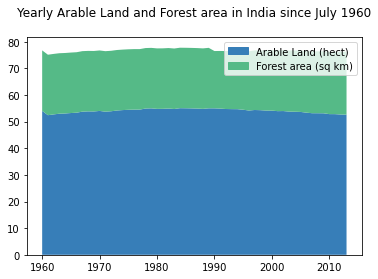

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# data visualization
plt.figure()
plt.title("Yearly Arable Land and Forest area in India since July 1960\n")
plt.stackplot(dataIndia.iloc[:,0],
          [dataIndia.iloc[:,1], dataIndia.iloc[:,2]], 
          colors=['#377EB8','#55BA87'])

plt.legend([mpatches.Patch(color='#377EB8'),  
            mpatches.Patch(color='#55BA87'),], 
           ['Arable Land (hect)','Forest area (sq km)'])
plt.show()

For country India, the Arable or productive land is twice as more as the land acquired by the forests in the country.

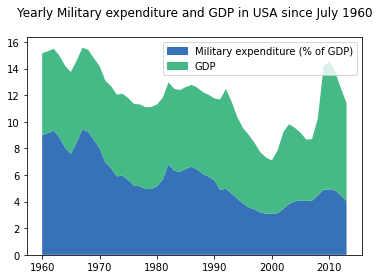

In [8]:
plt.title("Yearly Military expenditure and GDP in USA since July 1960\n")
plt.stackplot(dataUSA.iloc[:,0],
          [dataUSA.iloc[:,9], dataUSA.iloc[:,5]], 
          colors=['#3771B8','#45BA87'])

plt.legend([mpatches.Patch(color='#3771B8'),  
            mpatches.Patch(color='#45BA87'),], 
           ['Military expenditure (% of GDP)','GDP'])
plt.show()

US is spending a major chunk of its GDP in Military affairs. It is about 70%.

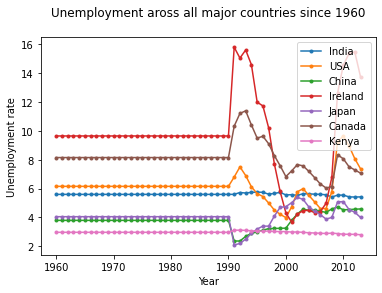

In [9]:
#plot the graph showing the variation of Unemployment rate for the various countries
plt.plot(dataIndia['Year'],dataIndia['Unemployment(% of total labor force)'],'.-')
plt.plot(dataUSA['Year'],dataUSA['Unemployment(% of total labor force)'],'.-')
plt.plot(dataChina['Year'],dataChina['Unemployment(% of total labor force)'],'.-')
plt.plot(dataIreland['Year'],dataIreland['Unemployment(% of total labor force)'],'.-')
plt.plot(dataJapan['Year'],dataJapan['Unemployment(% of total labor force)'],'.-')
plt.plot(dataCanada['Year'],dataCanada['Unemployment(% of total labor force)'],'.-')
plt.plot(dataKenya['Year'],dataKenya['Unemployment(% of total labor force)'],'.-')
plt.legend(['India', 'USA','China','Ireland','Japan','Canada','Kenya'], loc='best')
plt.title("Unemployment aross all major countries since 1960\n")
plt.xlabel('Year')
plt.ylabel('Unemployment rate')
plt.show()


The graph shows that for countries like Ireland, Canada and USA has peak unemployment rate during 2000's and then later dropped in 2010's.

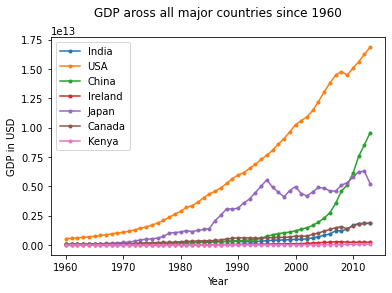

In [10]:
#plot the graph showing the variation of GDP for the various countries
plt.plot(dataIndia['Year'],dataIndia['GDP in USD'],'.-')
plt.plot(dataUSA['Year'],dataUSA['GDP in USD'],'.-')
plt.plot(dataChina['Year'],dataChina['GDP in USD'],'.-')
plt.plot(dataIreland['Year'],dataIreland['GDP in USD'],'.-')
plt.plot(dataJapan['Year'],dataJapan['GDP in USD'],'.-')
plt.plot(dataCanada['Year'],dataCanada['GDP in USD'],'.-')
plt.plot(dataKenya['Year'],dataKenya['GDP in USD'],'.-')
plt.legend(['India', 'USA','China','Ireland','Japan','Canada','Kenya'], loc='best')
plt.title("GDP aross all major countries since 1960\n")
plt.xlabel('Year')
plt.ylabel('GDP in USD')
plt.show()

US the superpower has the highest GDP. GDP of China increased in the 2010 dramatically.

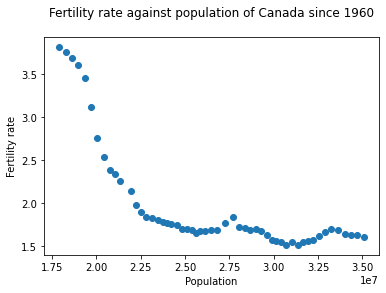

In [11]:
plt.scatter(dataCanada.iloc[:,8],dataCanada.iloc[:,7])
plt.title("Fertility rate against population of Canada since 1960\n")
plt.xlabel('Population')
plt.ylabel('Fertility rate')
plt.show() 

Fertility rate has dropped with increasing population over the years in Canada. This may be due to woman prefering less babies in modern times.

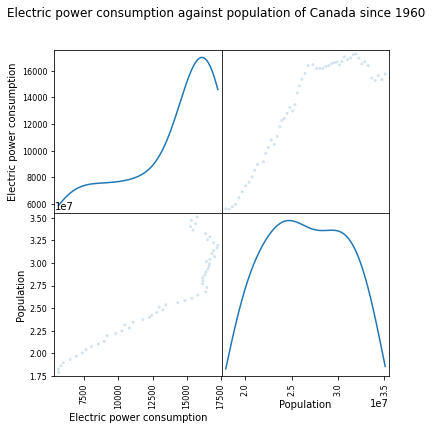

In [15]:
df = pd.concat([dataCanada.iloc[:,3], dataCanada.iloc[:,8]], axis=1)
df.columns = ['Electric power consumption','Population']
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.suptitle("Electric power consumption against population of Canada since 1960\n")
plt.show()

The power consumption has increased with the population over the years in Canada.

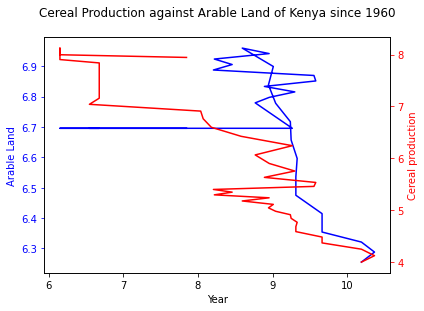

In [16]:

fig, ax1 = plt.subplots()
ax1.plot(dataKenya.iloc[:,1], dataKenya.iloc[:,2], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Arable Land', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(dataKenya.iloc[:,1], dataKenya.iloc[:,7], 'r-')
ax2.set_ylabel('Cereal production', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title("Cereal Production against Arable Land of Kenya since 1960\n")
plt.show()

The features Arable land and cereal production are highly correlated. Both of them increased over the years in Kenya. 
The more productive is the land, more will be the production of cereals.


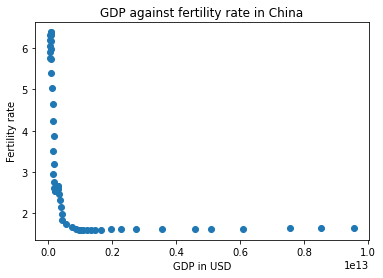

In [17]:

plt.scatter(dataChina['GDP in USD'],dataChina['Fertility rate'] )
plt.title('GDP against fertility rate in China')
plt.xlabel('GDP in USD')
plt.ylabel('Fertility rate')
plt.show()

In China (and its true for any other country), there is no relationship between GDP and Fertility rate as clearly shown by the graph which make perfect sense.